# r/Cornell Data

### Text Preprocessing

In [2]:
!pip3 install emoji
#!pip3 install nltk
#!pip3 install spacy
import pandas as pd
import emoji as emoji
import nltk
from nltk.tokenize import RegexpTokenizer
#!python -m spacy download en_core_web_sm
import spacy
import en_core_web_sm
from nltk.stem import WordNetLemmatizer

     |████████████████████████████████| 175 kB 4.1 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5716dcc721138c625a9c465194d1ada8b246b31ca78950808cc400a55e994273
  Stored in directory: /Users/gabychu/Library/Caches/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
Successfully built emoji


In [3]:
data = pd.read_csv("cornell_final.csv")
data.head()

,author,title,selftext,created_utc,created,score,num_comments,num_crossposts
0,emzow,Good places to Slavic squat on campus?,NaN,2022-03-01 04:34:07,1.646124e+09,1,0,0
1,Its3amInRisley,COVID MEGATHREAD,Please guys remember to direct COVID stuff to ...,2022-03-01 04:22:08,1.646123e+09,1,0,0
2,sellingminifridge,Selling hasan minhaj ticket!,dm if anyone wants to buy one ticket for wedne...,2022-03-01 04:21:10,1.646123e+09,1,0,0
3,SwordfishInfamous,Is Louise open rn,Title,2022-03-01 04:19:52,1.646123e+09,1,0,0
4,HaliTheGreat,"Anyone here in the Johnstown, Altoona, or Pitt...",I have a 4 hour drive to my town in West PA bu...,2022-03-01 04:17:59,1.646123e+09,1,0,0


In [4]:
len(data)

49851

In [5]:
data = data[(data['selftext'] != '') & (data['selftext'] != '[removed]') 
                          & (data['selftext'] != '[deleted]') & (data['author'] != '[deleted]')]

In [6]:
len(data)

48695

In [7]:
data = data.dropna()

In [8]:
data.reset_index(inplace = True)

In [9]:
data.head()

,index,author,title,selftext,created_utc,created,score,num_comments,num_crossposts
0,1,Its3amInRisley,COVID MEGATHREAD,Please guys remember to direct COVID stuff to ...,2022-03-01 04:22:08,1.646123e+09,1,0,0
1,2,sellingminifridge,Selling hasan minhaj ticket!,dm if anyone wants to buy one ticket for wedne...,2022-03-01 04:21:10,1.646123e+09,1,0,0
2,3,SwordfishInfamous,Is Louise open rn,Title,2022-03-01 04:19:52,1.646123e+09,1,0,0
3,4,HaliTheGreat,"Anyone here in the Johnstown, Altoona, or Pitt...",I have a 4 hour drive to my town in West PA bu...,2022-03-01 04:17:59,1.646123e+09,1,0,0
4,7,WokeDarkQueenNY,Don’t wear masks if you don’t want to,This is ridiculous that they are still a thing,2022-03-01 03:43:46,1.646121e+09,1,0,0


In [10]:
text_all = []
for i in data.loc[:,"selftext"]:
    text_all.append(i)
print('Total posts scraped:', len(text_all))

Total posts scraped: 39610


In [11]:
text_list = text_all
text_list = [str(i) for i in text_list] #this makes every title into a string itself but separated by commas 

In [12]:
#removing emojis
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

text_clean = [give_emoji_free_text(i) for i in text_list]

/var/folders/yf/2m7vdqqs0v16g0qhwl70d1700000gn/T/ipykernel_51954/3169644018.py:3: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return emoji.get_emoji_regexp().sub(r'', text)


### Tokenization and Stopword Removal

In [13]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+?!!!')
tokenized_string = [tokenizer.tokenize(i) for i in text_clean]
print(tokenized_string[:5])

[['Please', 'guys', 'remember', 'to', 'direct', 'COVID', 'stuff', 'to', 'the', 'COVID', 'megathread', 'There', 'is', 'a', 'lot', 'of', 'good', 'stuff', 'being', 'talked', 'about', 'there', 'right', 'now', 'about', 'the', 'mask', 'mandate', 'possibly', 'getting', 'lifted', 'for', 'Wednesday', 'or', 'next', 'week', 'Really', 'good', 'conversation', 'check', 'out', 'the', 'megathread'], ['dm', 'if', 'anyone', 'wants', 'to', 'buy', 'one', 'ticket', 'for', 'wednesday'], ['Title'], ['I', 'have', 'a', '4', 'hour', 'drive', 'to', 'my', 'town', 'in', 'West', 'PA', 'but', 'if', 'I', 'am', 'able', 'to', 'make', 'it', 'to', 'one', 'of', 'these', 'places', 'the', 'drive', 'is', 'easier', 'for', 'my', 'parents', 'I', 'would', 'just', 'go', 'with', 'you', 'to', 'whatever', 'city', 'you', 'are', 'in', 'and', 'then', 'link', 'up', 'with', 'my', 'parents', 'there', 'I', 'am', 'willing', 'to', 'pay', 'gas', 'and', 'buy', 'you', 'food', 'and', 'whatever'], ['This', 'is', 'ridiculous', 'that', 'they', 'are

In [14]:
lower_case = []
for sent in tokenized_string:
    word_list = []
    for word in sent:
        word_list.append(word.lower())
    lower_case.append(word_list)

print(lower_case[:5])

[['please', 'guys', 'remember', 'to', 'direct', 'covid', 'stuff', 'to', 'the', 'covid', 'megathread', 'there', 'is', 'a', 'lot', 'of', 'good', 'stuff', 'being', 'talked', 'about', 'there', 'right', 'now', 'about', 'the', 'mask', 'mandate', 'possibly', 'getting', 'lifted', 'for', 'wednesday', 'or', 'next', 'week', 'really', 'good', 'conversation', 'check', 'out', 'the', 'megathread'], ['dm', 'if', 'anyone', 'wants', 'to', 'buy', 'one', 'ticket', 'for', 'wednesday'], ['title'], ['i', 'have', 'a', '4', 'hour', 'drive', 'to', 'my', 'town', 'in', 'west', 'pa', 'but', 'if', 'i', 'am', 'able', 'to', 'make', 'it', 'to', 'one', 'of', 'these', 'places', 'the', 'drive', 'is', 'easier', 'for', 'my', 'parents', 'i', 'would', 'just', 'go', 'with', 'you', 'to', 'whatever', 'city', 'you', 'are', 'in', 'and', 'then', 'link', 'up', 'with', 'my', 'parents', 'there', 'i', 'am', 'willing', 'to', 'pay', 'gas', 'and', 'buy', 'you', 'food', 'and', 'whatever'], ['this', 'is', 'ridiculous', 'that', 'they', 'are

In [15]:
import string
from nltk.corpus import stopwords

stops = stopwords.words('english') # NLTK's short list of English stopwords

for punct in string.punctuation:
    stops.append(punct) # Add punctuation marks to stoplist
numbers = ['0','1','2','3','4','5','6','7','8','9']
for num in numbers:
    stops.append(num)
print("Our stopword list", stops)

Our stopword list ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

In [16]:
no_stop =[]
for sent in lower_case:
    no_stop_sent =[]
    for word in sent:
        if word not in stops:
            no_stop_sent.append(word)
    no_stop.append(no_stop_sent)
no_stop[:2]
    

[['please',
  'guys',
  'remember',
  'direct',
  'covid',
  'stuff',
  'covid',
  'megathread',
  'lot',
  'good',
  'stuff',
  'talked',
  'right',
  'mask',
  'mandate',
  'possibly',
  'getting',
  'lifted',
  'wednesday',
  'next',
  'week',
  'really',
  'good',
  'conversation',
  'check',
  'megathread'],
 ['dm', 'anyone', 'wants', 'buy', 'one', 'ticket', 'wednesday']]

### Sentiment Scoring

In [18]:
from collections import defaultdict
import nltk
import os
import random

#nltk.download('opinion_lexicon') # Need to download this the first time used

# NLTK simple lexicon (from Hu and Liu (2004))
nltk_lexicon = {
    'positive' : set(nltk.corpus.opinion_lexicon.positive()), # Why cast to a set?
    'negative' : set(nltk.corpus.opinion_lexicon.negative())
}

# Print a sample of the NLTK lexicon
print('NLTK lexicon sample')
for key in nltk_lexicon.keys():
    print(f'{key}:', random.sample(tuple(nltk_lexicon[key]), 5))
    
# NRC EmoLex lexicon (from Mohammad, http://sentiment.nrc.ca/lexicons-for-research/)
# No package for this, just read the data from a local file
emolex_file = os.path.join('emolex.txt')
nrc_lexicon = defaultdict(dict) # Like Counter(), defaultdict eases dictionary creation
with open(emolex_file, 'r') as f:
    # emolex file format is: word emotion value
    for line in f:
        word, emotion, value = line.strip().split()
        nrc_lexicon[word][emotion] = int(value)
        
# Print a sample of the NRC EmoLex lexicon
print('\nNRC lexicon sample')       
for key in random.sample(tuple(nrc_lexicon.keys()), 2):
    print(f'{key}:', nrc_lexicon[key])

NLTK lexicon sample
positive: ['congratulatory', 'masterpiece', 'integrated', 'dumbfounding', 'guidance']
negative: ['sardonically', 'scorn', 'illness', 'haunting', 'tentatively']

NRC lexicon sample
interworking: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
unpack: {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}


In [19]:
def word_sentiment_score(word, method='nrc', lex=nrc_lexicon):
    '''
    Takes a word, optional method in ['nrc', 'nltk'], and optional lexicon dictionary.
    Returns 1 (if positive), -1 (if negative), 0 (neutral), or None (not in lex).
    '''
    word = word.lower() # Handle non-case-folded inputs
    if method.lower() == 'nrc':
        if word in lex: # Only score words that are in the lexicon
            pos = lex[word]['positive']
            neg = lex[word]['negative']
            if pos == neg: # Ties (mostly 0==0) return zero
                return 0
            elif pos > neg:
                return 1
            else:
                return -1
    elif method.lower() == 'nltk':
        if word in lex['positive']:
            return 1
        elif word in lex['negative']:
            return -1
    else:
        raise NameError("Method not in ['nrc', 'nltk']")
    return 0

In [20]:
def average(lst):
    return sum(lst) / len(lst)

sentiment_scores = []
for sent in no_stop:
    word_list =[]
    for word in sent:
        word_list.append(word_sentiment_score(word))
    if (len(word_list) != 0):
        avg = average(word_list)
        sentiment_scores.append(avg)
    else:
        sentiment_scores.append(0)
len(sentiment_scores)
        

39610

In [21]:
df = pd.DataFrame(list(zip(sentiment_scores, data['created_utc'] )),
               columns =['sentiment_score', 'date'])
df.sort_values('date', inplace = True)

# convert to date
df['date'] = pd.to_datetime(df['date'])

In [23]:
# average sentiment for each day
daily_avg_sent = df.groupby([df["date"].dt.date])["sentiment_score"].mean()
daily_avg_sent.head()

date
2019-03-01    0.040417
2019-03-02    0.084481
2019-03-03    0.102273
2019-03-04    0.076699
2019-03-05    0.063876
Name: sentiment_score, dtype: float64

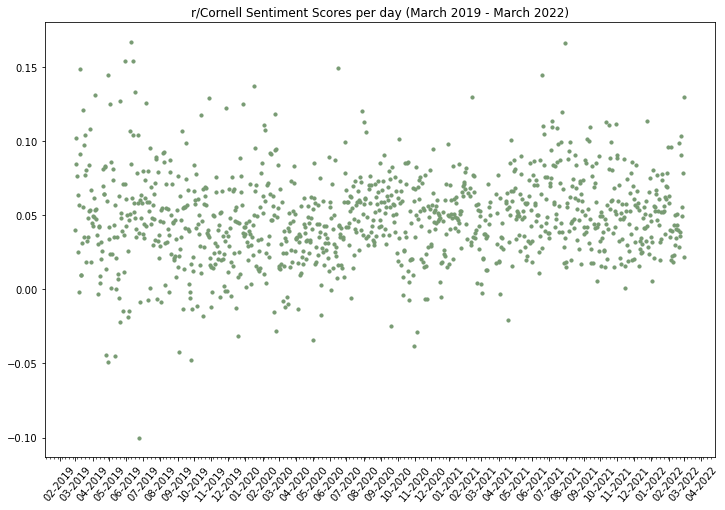

In [46]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(daily_avg_sent.index, daily_avg_sent.values, s =10, c = 'xkcd:grey green')

# ticks on Mondays every 4 weeks 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO))
plt.xticks(rotation = 50)
plt.title("r/Cornell Sentiment Scores per day (March 2019 - March 2022)")

plt.show()

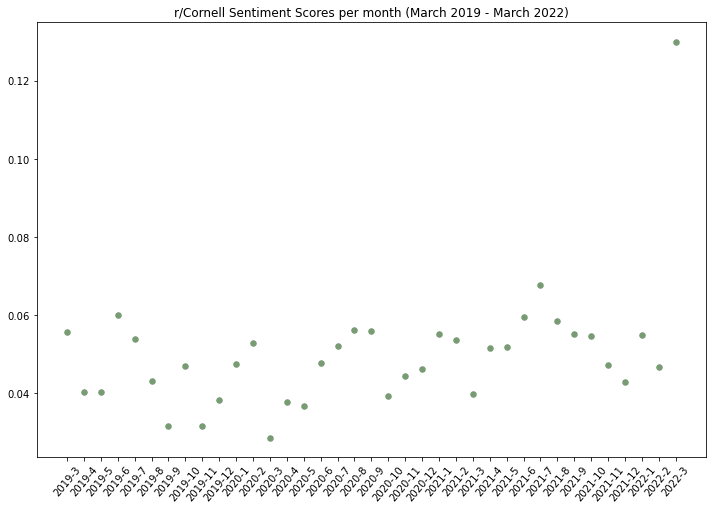

In [39]:
weekly_avg_sent = df.groupby([df['date'].dt.year, df['date'].dt.month]).mean()
weekly_avg_sent.head()

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 8))

idx = weekly_avg_sent.index
idx = idx.to_series().apply(lambda x: '{0}-{1}'.format(*x))

ax.scatter(idx, weekly_avg_sent.sentiment_score, s=30, c = 'xkcd:grey green')

#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 50)
plt.title("r/Cornell Sentiment Scores per month (March 2019 - March 2022)")

plt.show()

In [159]:
# make new dataframe replacing selftext with self text without stop words

nostop_df = pd.DataFrame(list(zip(no_stop, data['created_utc'] )),
               columns =['selftext', 'date'])
nostop_df['date'] = pd.to_datetime(nostop_df['date'])

In [160]:
# join words in the list together to get more concise ouptut for Counter object
nostop_df["selftext"]= nostop_df["selftext"].str.join(" ")

In [161]:
nostop_df.head()

,selftext,date
0,please guys remember direct covid stuff covid ...,2022-03-01 04:22:08
1,dm anyone wants buy one ticket wednesday,2022-03-01 04:21:10
2,title,2022-03-01 04:19:52
3,hour drive town west pa able make one places d...,2022-03-01 04:17:59
4,ridiculous still thing,2022-03-01 03:43:46


In [162]:
# sample of getting most commons words out for 3/2019

month = (nostop_df[nostop_df['date'] < '2019-04'])
text = []
for i in month.loc[:,"selftext"]:
    text.append(i)

string =' '.join([str(post) for post in text])

In [163]:
split = string.split()
monthCounter = Counter(split)

In [164]:
print('10 most common words in March 2019:')
display(monthCounter.most_common(10))
#monthCounter

10 most common words in March 2019:


[('cornell', 135),
 ('know', 96),
 ('anyone', 94),
 ('would', 92),
 ('get', 83),
 ('like', 80),
 ('saaano', 77),
 ('class', 60),
 ('got', 54),
 ('year', 54)]

In [183]:
# iterating over months
from datetime import datetime
from dateutil import rrule

months = []
most_common = []
 
# dates
start_date = datetime(2019, 4, 1)
end_date = datetime(2022, 3, 1)
 
for dt in rrule.rrule(rrule.MONTHLY, dtstart=start_date, until=end_date):
    month = nostop_df[nostop_df['date'] < dt]
    text = []
    for i in month.loc[:,"selftext"]:
        text.append(i)
    string =' '.join([str(post) for post in text])
    split = string.split()
    monthCounter = Counter(split)
    most_common.append(monthCounter.most_common(20))
    #print(nostop_df[nostop_df['date'] < dt])
    nostop_df.drop(nostop_df[nostop_df['date'] < dt], inplace = True)

In [189]:
nostop_df


,selftext,date
0,please guys remember direct covid stuff covid ...,2022-03-01 04:22:08
1,dm anyone wants buy one ticket wednesday,2022-03-01 04:21:10
2,title,2022-03-01 04:19:52
3,hour drive town west pa able make one places d...,2022-03-01 04:17:59
4,ridiculous still thing,2022-03-01 03:43:46
...,...,...
39605,bad take second one first semester sophomore,2019-03-01 17:29:55
39606,goes highest bidder also posting facebook seat...,2019-03-01 16:23:17
39607,willing buy tix,2019-03-01 15:57:35
39608,clearly labeled comprehensive website easy way...,2019-03-01 12:53:28


### Sentiment Dictionaries

In [ ]:
from   collections import defaultdict
from   glob import glob
from   nltk import word_tokenize, sent_tokenize
import numpy as np
import os
import string

In [ ]:
df

In [ ]:
# A freebie helper function to read and parse the emolex file
def read_emolex(filepath=None):
    '''
    Takes a file path to the emolex lexicon file.
    Returns a dictionary of emolex sentiment values.
    '''
    if filepath==None: # Try to find the emolex file
        filepath = os.path.join('info3350-s22','data','lexicons','emolex.txt')
        if os.path.isfile(filepath):
            pass
        elif os.path.isfile('emolex.txt'):
            filepath = 'emolex.txt'
        else:
            raise FileNotFoundError('No EmoLex file found')
    emolex = defaultdict(dict) # Like Counter(), defaultdict eases dictionary creation
    with open(filepath, 'r') as f:
    # emolex file format is: word emotion value
        for line in f:
            word, emotion, value = line.strip().split()
            emolex[word][emotion] = int(value)
    return emolex

# Get EmoLex data. Make sure you set the right file path above.
emolex = read_emolex(emolex_file)

In [ ]:
# Define your sentiment_score function here
def sentiment_score(sentence, emolex):
    
    from collections import Counter 
    
    sent_score = Counter()
    
    for token in sentence:
        if token in emolex.keys() and emolex[token]:
            sent_score.update((Counter(emolex[token])))
            
    for key in sent_score:
        sent_score[key] /= len(sentence)
        
    
    return dict(sent_score)

In [ ]:
# Run sentiment_score function on each post and print results

scores = []
x = 1
for token in no_stop:
    #print("Sentence", x, "Score:")
    score = sentiment_score(token, emolex)
    #print("\n")
    scores.append(score)
    x += 1
    

In [ ]:
len(scores)

In [ ]:
scores[:3]

In [260]:
%matplotlib inline
def visualize_emotion_scores(scores):
    import pandas as pd
    import seaborn as sns
    df = pd.DataFrame.from_dict(scores)
    values = df.columns
    df = df.reset_index().melt(id_vars='index', value_vars=values, var_name='emotion')
    sns.set_context('poster')
    g = sns.catplot(x='value', y='value', col='emotion', data=df, kind='bar', col_wrap=4)
    return g

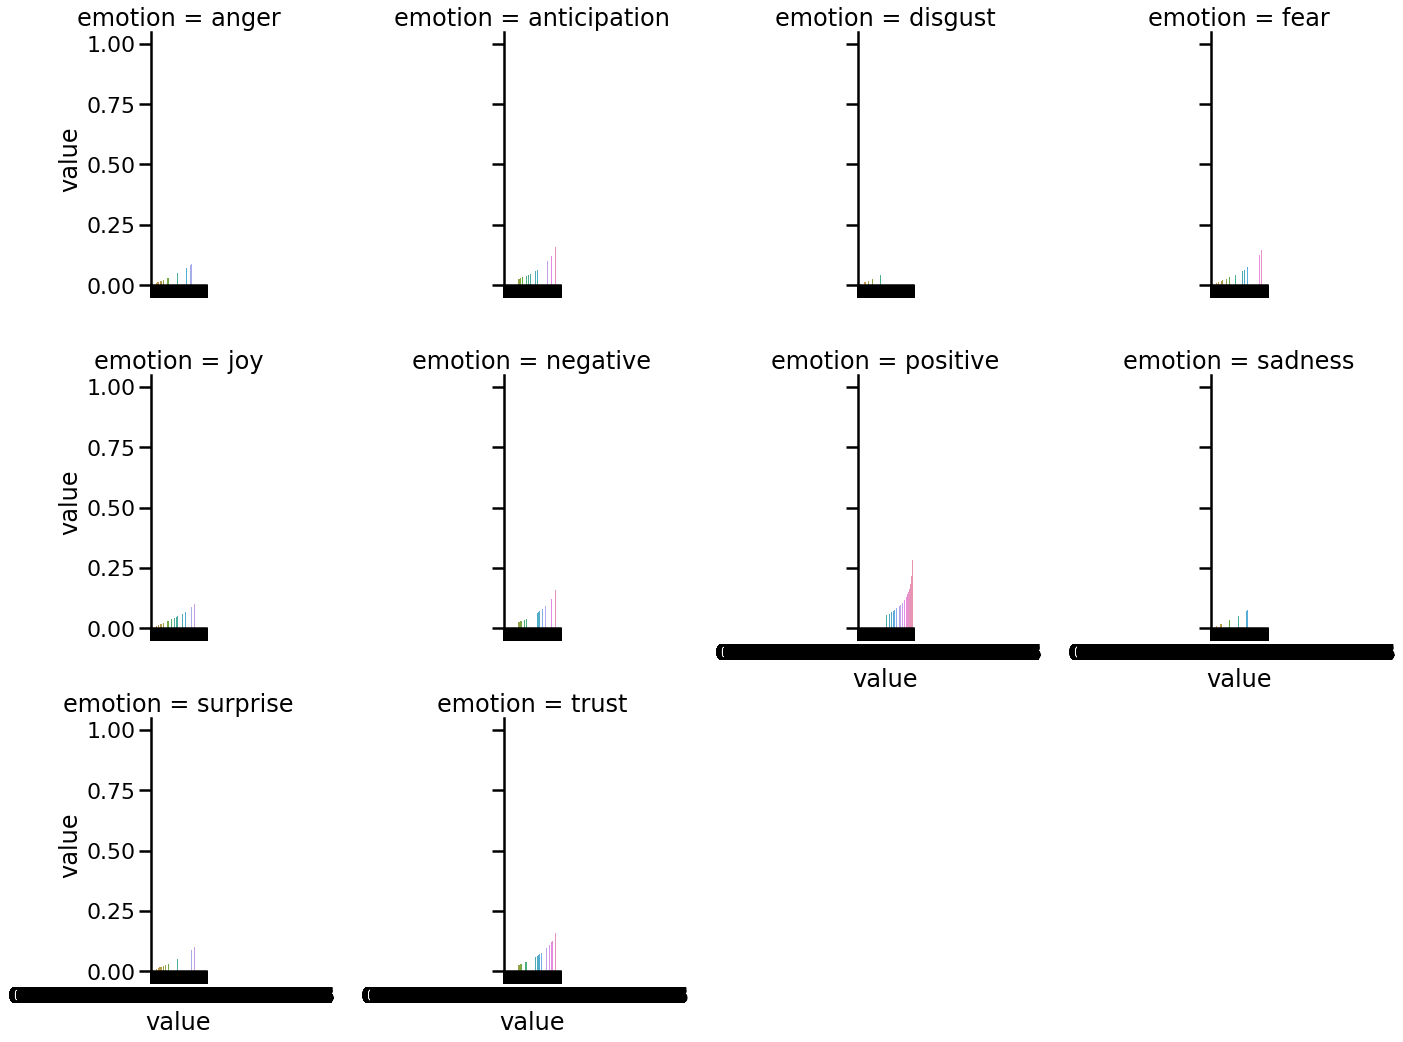

In [261]:
visualize_emotion_scores(scores)